In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt", "r").read().splitlines()

In [3]:
"".join(words[:4])

'emmaoliviaavaisabella'

In [4]:
set("".join(words[:4]))

{'a', 'b', 'e', 'i', 'l', 'm', 'o', 's', 'v'}

In [3]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

### Build Dataset

In [7]:
block_size = 3
X, Y = [], []

for w in words[:5]:
    print(w)

    context = [0] * block_size
    for ch in w+".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), "---->", itos[ix])

        context = context[1:]+[ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [8]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

### Embedding Lookup table

In [13]:
C = torch.randn((27,2))

In [14]:
C[5]

tensor([-1.6058, -0.0563])

In [16]:
C.shape

torch.Size([27, 2])

In [18]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.6058, -0.0563])

we'll just index instead of one hot

In [19]:
C[1]

tensor([-1.6558,  0.8278])

In [20]:
X[13,2]

tensor(1)

In [21]:
C[X][13,2]

tensor([-1.6558,  0.8278])

In [22]:
C[X].shape

torch.Size([32, 3, 2])

take every element of X and pass each as index of C

In [23]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

#### Layer 1

In [24]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

C[X] => the 3 embeddings need to be concatenated

In [26]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [27]:
len(torch.unbind(emb,1))

3

In [29]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [30]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [31]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

no memory is copied when viewed. just interpretation is changed

In [32]:
emb.view(32,6)

tensor([[-1.6102, -0.1468, -1.6102, -0.1468, -1.6102, -0.1468],
        [-1.6102, -0.1468, -1.6102, -0.1468, -1.6058, -0.0563],
        [-1.6102, -0.1468, -1.6058, -0.0563,  0.2482, -0.4006],
        [-1.6058, -0.0563,  0.2482, -0.4006,  0.2482, -0.4006],
        [ 0.2482, -0.4006,  0.2482, -0.4006, -1.6558,  0.8278],
        [-1.6102, -0.1468, -1.6102, -0.1468, -1.6102, -0.1468],
        [-1.6102, -0.1468, -1.6102, -0.1468, -0.7134, -0.5332],
        [-1.6102, -0.1468, -0.7134, -0.5332, -0.4005,  1.2352],
        [-0.7134, -0.5332, -0.4005,  1.2352, -1.0746,  0.5261],
        [-0.4005,  1.2352, -1.0746,  0.5261,  1.5129,  1.3195],
        [-1.0746,  0.5261,  1.5129,  1.3195, -1.0746,  0.5261],
        [ 1.5129,  1.3195, -1.0746,  0.5261, -1.6558,  0.8278],
        [-1.6102, -0.1468, -1.6102, -0.1468, -1.6102, -0.1468],
        [-1.6102, -0.1468, -1.6102, -0.1468, -1.6558,  0.8278],
        [-1.6102, -0.1468, -1.6558,  0.8278,  1.5129,  1.3195],
        [-1.6558,  0.8278,  1.5129,  1.3

In [33]:
h = emb.view(-1, 6) @ W1 + b1

In [35]:
h.shape

torch.Size([32, 100])

concatenation is inefficient compared to view

In [36]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [37]:
h.shape

torch.Size([32, 100])

In [38]:
h

tensor([[-0.9468,  0.3974, -0.9903,  ...,  0.9957, -0.9916, -0.8656],
        [-0.9356,  0.4128, -0.9937,  ...,  0.9958, -0.9929, -0.8789],
        [ 0.4031, -0.9265, -0.7942,  ...,  0.9787,  0.9690, -0.5065],
        ...,
        [ 0.9784,  0.4578, -0.9996,  ..., -0.3568, -0.9530, -0.6028],
        [-0.0860, -0.2669, -0.9967,  ..., -0.9864, -0.9996,  0.9158],
        [-0.8321, -0.9235, -0.9993,  ...,  0.9959, -0.9993, -0.3709]])

#### Layer 2

In [39]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [40]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [42]:
counts = logits.exp()

In [44]:
probs = counts/counts.sum(dim=1, keepdims = True)

obtain prob for each index corresponding to the value of Y

In [45]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [46]:
probs[torch.arange(32), Y]

tensor([9.6833e-01, 3.2665e-09, 2.3291e-09, 1.5504e-09, 1.3050e-10, 3.4718e-09,
        2.6831e-18, 1.7874e-10, 2.2824e-11, 6.1442e-10, 4.2551e-12, 2.3661e-13,
        1.0851e-09, 2.2041e-08, 2.0871e-09, 7.0646e-03, 1.4510e-11, 1.9801e-10,
        1.8765e-09, 3.3796e-11, 2.5241e-02, 6.8772e-15, 8.1102e-13, 1.0115e-10,
        9.0794e-12, 3.2575e-13, 1.0918e-10, 1.5851e-04, 5.7997e-06, 1.1566e-15,
        1.1049e-10, 3.1012e-13])

In [48]:
loss = - probs[torch.arange(32), Y].log().mean()
loss.item()

21.617198944091797

### Overall Flow

In [51]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) #embedding matrix

W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)


W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

In [55]:
parameters = [C, W1, W2, b1, b2]

sum(p.nelement() for p in parameters)

3481

In [52]:
emb = C[X]
h = (emb.view(-1, 6) @ W1 + b1).tanh()
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(dim=1, keepdims=True)
loss = - prob[torch.arange(32), Y].log().mean()
loss.item()

17.769710540771484

In [56]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [57]:
emb = C[X]
h = (emb.view(-1, 6) @ W1 + b1).tanh()
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(dim=1, keepdims=True)
# loss = - prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss.item()

17.769712448120117

Exponentiation for positive values may cause go out of the floating range and produce inf

In [59]:
logits = torch.tensor([-100, -4, -3, 100])
counts = logits.exp()
counts = counts / counts.sum()
counts

tensor([0., 0., 0., nan])

any offset doesnt change the counts due to normalization. pytorch internally subtracts the maximum value as offset 

In [60]:
logits = torch.tensor([-100, -4, -3, 100]) - 100
counts = logits.exp()
counts = counts / counts.sum()
counts

tensor([0.0000e+00, 0.0000e+00, 1.4013e-45, 1.0000e+00])

### Training

In [62]:
for p in parameters:
    p.requires_grad = True

In [65]:
for _ in range(1000):
    #forward pass
    emb = C[X]
    h = (emb.view(-1, 6) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad


print(loss.item())

0.25603100657463074


#### Training on full dataset

In [67]:
block_size = 3
X, Y = [], []

for w in words:

    context = [0] * block_size
    for ch in w+".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        context = context[1:]+[ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [68]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [76]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) #embedding matrix

W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)


W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

In [77]:
parameters = [C, W1, W2, b1, b2]

sum(p.nelement() for p in parameters)

3481

In [78]:
for p in parameters:
    p.requires_grad = True

In [72]:
for _ in range(10):
    #forward pass
    emb = C[X]
    h = (emb.view(-1, 6) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)

    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad



19.505229949951172
17.08449363708496
15.776532173156738
14.833344459533691
14.002608299255371
13.253264427185059
12.57992172241211
11.98310661315918
11.470499992370605
11.051865577697754


this is very slow. we need to use minibatches instead. the gradient will not be perfect but will be alright

### Using minibatches

In [17]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) #embedding matrix

W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)


W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, W2, b1, b2]

for p in parameters:
    p.requires_grad = True

In [5]:
torch.randint(0,5 , (32,))

tensor([4, 1, 3, 2, 1, 4, 1, 2, 0, 1, 4, 4, 0, 2, 4, 1, 2, 2, 3, 2, 3, 0, 2, 4,
        1, 4, 4, 2, 2, 4, 2, 2])

In [9]:
for _ in range(1000):

    
    ix = torch.randint(0,X.shape[0] , (32,))
    #forward pass
    emb = C[X[ix]]
    h = (emb.view(-1, 6) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad


print(loss.item())

0.2542445659637451


#### Determining learning rate

In [19]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [25]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) #embedding matrix

W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)


W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, W2, b1, b2]

for p in parameters:
    p.requires_grad = True

In [21]:
lri = []
lrei = []
lossi = []

for i in range(1000):

    
    ix = torch.randint(0,X.shape[0] , (32,))
    #forward pass
    emb = C[X[ix]]
    h = (emb.view(-1, 6) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    lr = lrs[i]
    lri.append(lr)
    lrei.append(lre[i])
    lossi.append(loss.item())
    for p in parameters:
        p.data += -lr * p.grad


print(loss.item())

0.6027141213417053


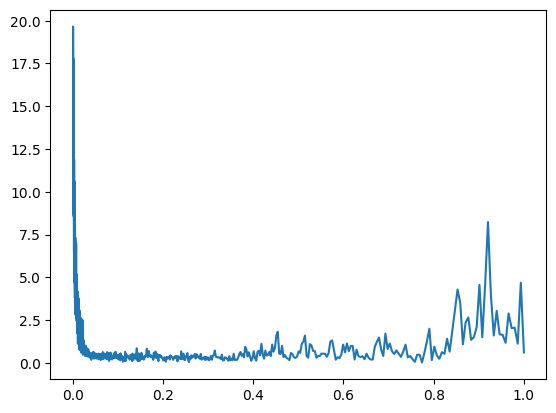

In [22]:
plt.plot(lri, lossi)

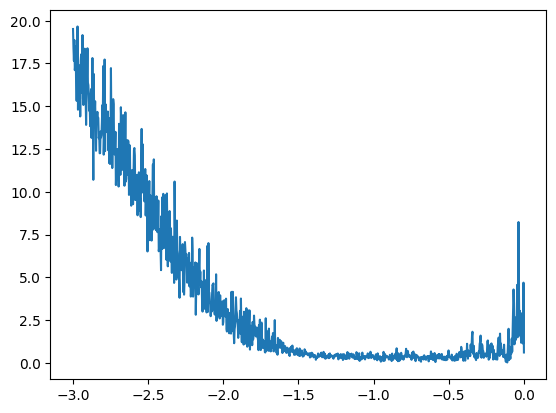

In [23]:
plt.plot(lrei, lossi)

In [26]:
for i in range(1000):

    
    ix = torch.randint(0,X.shape[0] , (32,))
    #forward pass
    emb = C[X[ix]]
    h = (emb.view(-1, 6) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    lr = 10**-1
    for p in parameters:
        p.data += -lr * p.grad


print(loss.item())

0.23941880464553833


In [29]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

0.2740665078163147

But model has to be divided into train, dev, test data. dev used for tuning the hyperparameters. Test loss need to be evaluated only a very few times. 

### Build train, test, valid dataset

In [31]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    
    for w in words:
    
        context = [0] * block_size
        for ch in w+".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
    
            context = context[1:]+[ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)   

    return X, Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

#### Parameters

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) #embedding matrix

W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)


W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, W2, b1, b2]

for p in parameters:
    p.requires_grad = True

#### Training loop

In [35]:
for i in range(30000):

    
    ix = torch.randint(0,Xtr.shape[0] , (32,))
    #forward pass
    emb = C[Xtr[ix]]
    h = (emb.view(-1, 6) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    lr = 10**-1
    for p in parameters:
        p.data += -lr * p.grad


print(loss.item())

2.4241466522216797


#### Evaluation

In [37]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.3313846588134766

In [36]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.337073802947998

training loss and dev loss are equal. We can improve performance by scaling up the NN

#### Large hidden layer

In [42]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) #embedding matrix

W1 = torch.randn((6,300), generator=g)
b1 = torch.randn(300, generator=g)


W2 = torch.randn((300,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, W2, b1, b2]

for p in parameters:
    p.requires_grad = True

In [39]:
lre = torch.linspace(-3, 0, 30000)
lrs = 10**lre


In [61]:
lossi = []
stepi = []

for i in range(30000):
    
    ix = torch.randint(0,Xtr.shape[0] , (32,))
    #forward pass
    emb = C[Xtr[ix]]
    h = (emb.view(-1, 6) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    lossi.append(loss.item())
    stepi.append(i)

    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad


print(loss.item())

2.280832052230835


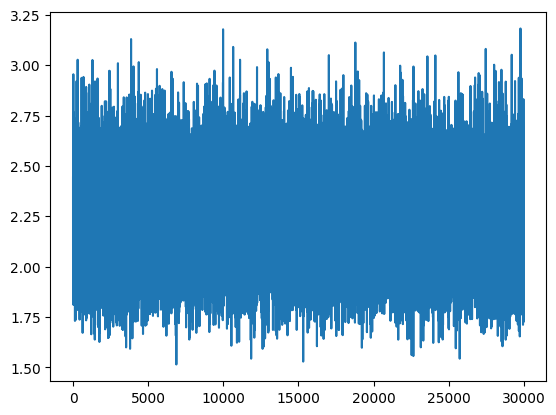

In [58]:
plt.plot(stepi, lossi)

#### Evaluation

In [62]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2350828647613525

In [63]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.2465620040893555

We will keep optimizing until training loss and dev loss equal

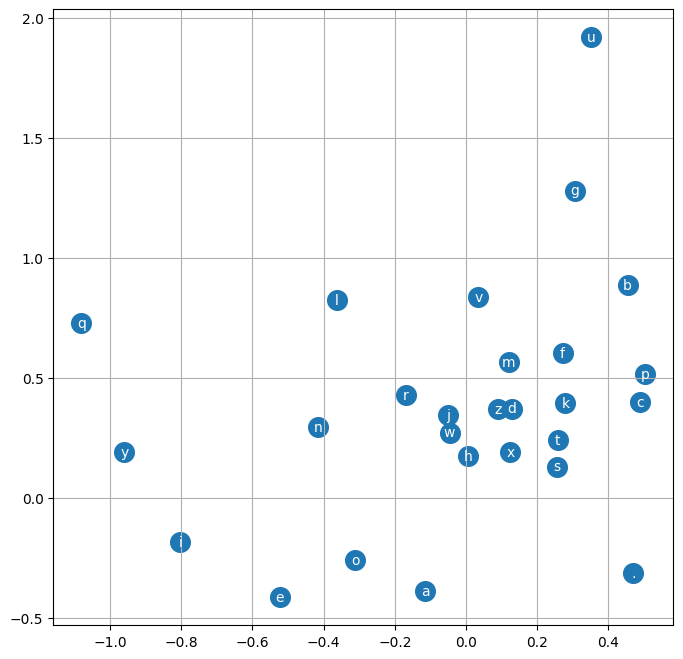

In [64]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

We have made the hidden layer bigger+decrease learning rate but still not converging. So the culprit may be the embedding layer. Let's make the embedding bigger

### Have 10 dim embeddings

In [67]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator = g) #embedding matrix

W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)


W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, W2, b1, b2]

for p in parameters:
    p.requires_grad = True

In [68]:
lossi = []
stepi = []

In [90]:


for i in range(50000):
    
    ix = torch.randint(0,Xtr.shape[0] , (32,))
    #forward pass
    emb = C[Xtr[ix]]
    h = (emb.view(-1, 30) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    lossi.append(loss.log10().item())
    stepi.append(i)

    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad


print(loss.item())

2.259211540222168


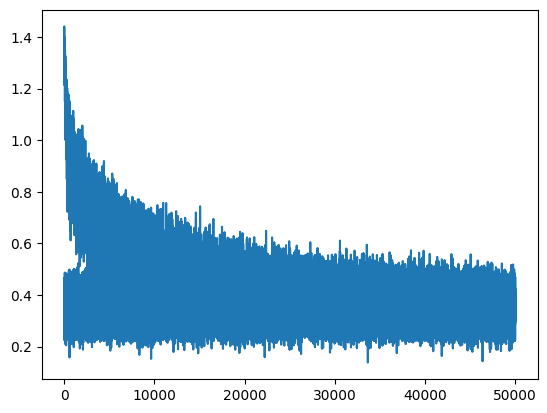

In [91]:
plt.plot(stepi, lossi)

#### Evaluation

In [92]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.239295721054077

In [93]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.2544102668762207

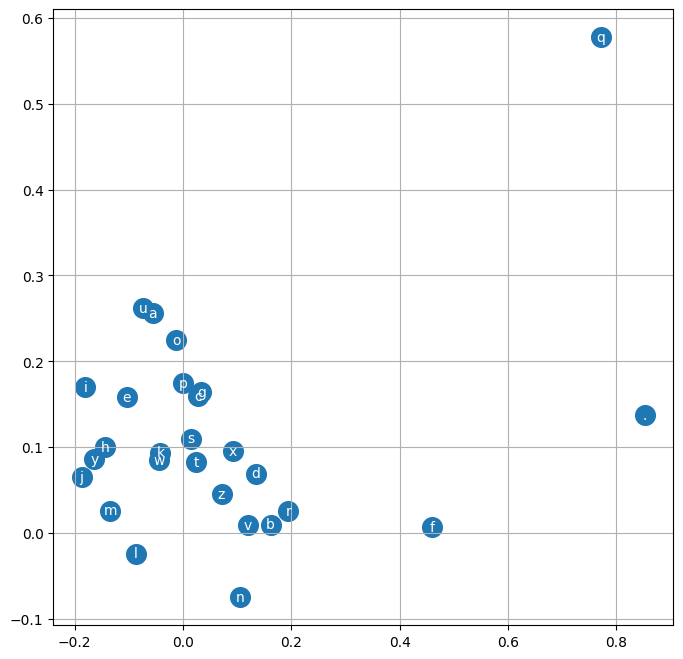

In [94]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

### Training for longer

In [95]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator = g) #embedding matrix

W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)


W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, W2, b1, b2]

for p in parameters:
    p.requires_grad = True

In [96]:
lossi = []
stepi = []

#### Sending the parameters to gpu

In [100]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [105]:
device

device(type='cuda')

In [101]:
Xtr.to(device), Ytr.to(device)

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5,  2],
         ...,
         [25,  1, 14],
         [ 1, 14, 14],
         [14, 14,  9]], device='cuda:0'),
 tensor([ 5,  2, 18,  ..., 14,  9,  0], device='cuda:0'))

In [102]:
for p in parameters:
    p.to(device)

In [104]:


for i in range(4*50000):
    
    ix = torch.randint(0,Xtr.shape[0] , (32,))
    #forward pass
    emb = C[Xtr[ix]]
    h = (emb.view(-1, 30) @ W1 + b1).tanh()
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    lossi.append(loss.log10().item())
    stepi.append(i)

    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    lr = 0.1 if i<100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad


print(loss.item())

1.7541700601577759


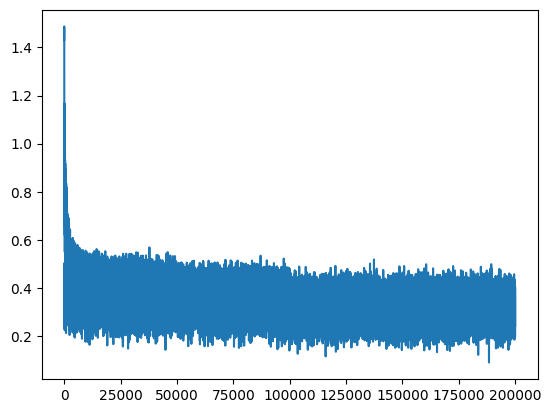

In [106]:
plt.plot(stepi, lossi)

In [107]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.1149299144744873

In [108]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.1645267009735107

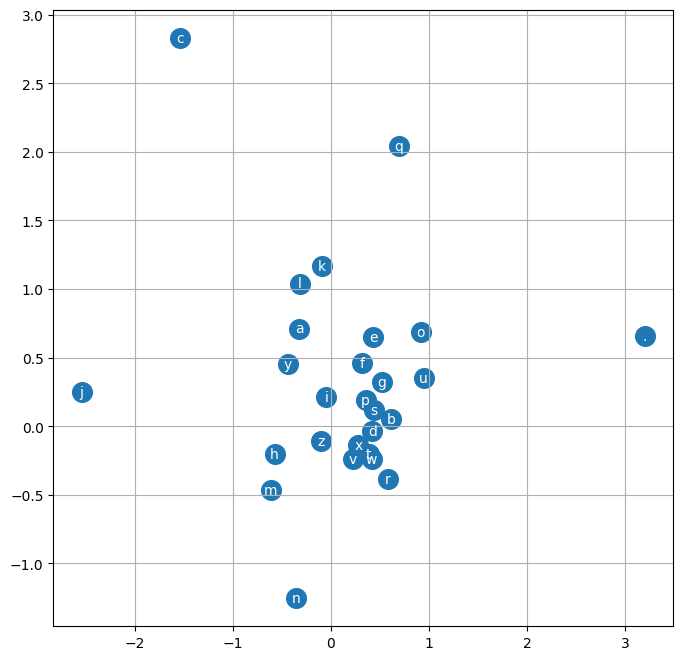

In [109]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

### Sampling from the model

In [111]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)
block_size = 3
for _ in range(20):
    out = []
    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])] #(1, blocksize, d)
        h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, generator=g, num_samples=1).item()

        context = context[1:]+[ix]
        out.append(itos[ix])
        if ix==0:
            break
    print("".join(out))

mora.
mayanniee.
madhayla.
remersleygon.
gradee.
daelin.
mayanelle.
elieananarielle.
malaia.
noshud.
roshiriel.
kinleen.
jerenteron.
ube.
ged.
ryylene.
ehs.
kayshaston.
mahil.
aalynn.


In [112]:
torch.cuda.empty_cache() 